## **Installing & Importing Libraries:**

In [ ]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 259 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

from sodapy import Socrata

import datetime
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import geopy
from geopy.geocoders import Nominatim

import json

## **Loading the Dataset:**

New York Film permits dataset has been taken from: https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p

API documentation: https://dev.socrata.com/foundry/data.cityofnewyork.us/tg4x-b46p

In [ ]:
#Code taken from API Documentation
#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("tg4x-b46p", limit=40000)

# Convert to pandas DataFrame
film_permits = pd.DataFrame.from_records(results)

In [ ]:
film_permits.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
0,672690,Shooting Permit,2022-09-14T06:00:00.000,2022-09-14T20:00:00.000,2022-09-13T11:35:05.000,"Mayor's Office of Film, Theatre & Broadcasting",COVERT STREET between WYCKOFF AVENUE and IRVIN...,Queens,"4, 5","104, 83",Television,Episodic series,United States of America,"11237, 11385"
1,672634,Shooting Permit,2022-09-14T07:00:00.000,2022-09-14T21:00:00.000,2022-09-13T09:21:49.000,"Mayor's Office of Film, Theatre & Broadcasting",QUEENS BOULEVARD between 76 ROAD and 78 AVENUE...,Queens,6,112,Television,Cable-episodic,United States of America,11375
2,672614,Theater Load in and Load Outs,2022-09-14T00:01:00.000,2022-09-14T23:59:00.000,2022-09-12T23:53:14.000,"Mayor's Office of Film, Theatre & Broadcasting",FROST STREET between DEBEVOISE AVENUE and MORG...,Brooklyn,1,94,Theater,Theater,United States of America,11222
3,672552,Shooting Permit,2022-09-14T07:00:00.000,2022-09-14T21:00:00.000,2022-09-12T16:12:32.000,"Mayor's Office of Film, Theatre & Broadcasting",MANHATTAN AVENUE between DEAD END and BOX STRE...,Brooklyn,1,94,Commercial,Commercial,United States of America,11222
4,672545,Shooting Permit,2022-09-14T06:00:00.000,2022-09-14T20:00:00.000,2022-09-12T15:55:40.000,"Mayor's Office of Film, Theatre & Broadcasting",NEPTUNE AVENUE between WEST 28 STREET and WE...,Brooklyn,13,60,Commercial,Promo,United States of America,11224


## **Data Pre-processing and Exploration:**

In [ ]:
film_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11372 entries, 0 to 11371
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   eventid           11372 non-null  object
 1   eventtype         11372 non-null  object
 2   startdatetime     11372 non-null  object
 3   enddatetime       11372 non-null  object
 4   enteredon         11372 non-null  object
 5   eventagency       11372 non-null  object
 6   parkingheld       11372 non-null  object
 7   borough           11372 non-null  object
 8   communityboard_s  11372 non-null  object
 9   policeprecinct_s  11372 non-null  object
 10  category          11372 non-null  object
 11  subcategoryname   11372 non-null  object
 12  country           11372 non-null  object
 13  zipcode_s         11372 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB


In [ ]:
film_permits.isnull().sum()

eventid             0
eventtype           0
startdatetime       0
enddatetime         0
enteredon           0
eventagency         0
parkingheld         0
borough             0
communityboard_s    0
policeprecinct_s    0
category            0
subcategoryname     0
country             0
zipcode_s           0
dtype: int64

In [ ]:
film_permits.describe()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
count,11372,11372,11372,11372,11372,11372,11372,11372,11372,11372,11372,11372,11372,11372
unique,11372,4,4436,5382,11212,1,6788,5,342,784,9,27,3,1391
top,672690,Shooting Permit,2021-11-01T07:00:00.000,2021-07-27T22:00:00.000,2021-10-08T13:24:11.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,1,94,Television,Episodic series,United States of America,11222
freq,1,10131,16,12,5,11372,183,4662,3041,1743,7253,5060,11355,1613


In [ ]:
film_permits['count_flag'] = pd.Series([1 for x in range(len(film_permits.index))])

**Converting the datatype of categorical variables from object to category:**

In [ ]:
film_permits['eventtype'] = film_permits['eventtype'].astype('category')
film_permits['eventagency'] = film_permits['eventagency'].astype('category')
film_permits['borough'] = film_permits['borough'].astype('category')
film_permits['category'] = film_permits['category'].astype('category')
film_permits['subcategoryname'] = film_permits['subcategoryname'].astype('category')
film_permits['country'] = film_permits['country'].astype('category')


**Converting the datatype of date variables from object to datetime:**

In [ ]:
film_permits['enddatetime']=pd.to_datetime(
                                  film_permits['enddatetime'],
                                 format='%Y/%m/%d %H:%M:%S')

film_permits['startdatetime']=pd.to_datetime(
                                  film_permits['startdatetime'],
                                 format='%Y/%m/%d %H:%M:%S')

In [ ]:
film_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11372 entries, 0 to 11371
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   eventid           11372 non-null  object        
 1   eventtype         11372 non-null  category      
 2   startdatetime     11372 non-null  datetime64[ns]
 3   enddatetime       11372 non-null  datetime64[ns]
 4   enteredon         11372 non-null  object        
 5   eventagency       11372 non-null  category      
 6   parkingheld       11372 non-null  object        
 7   borough           11372 non-null  category      
 8   communityboard_s  11372 non-null  object        
 9   policeprecinct_s  11372 non-null  object        
 10  category          11372 non-null  category      
 11  subcategoryname   11372 non-null  category      
 12  country           11372 non-null  category      
 13  zipcode_s         11372 non-null  object        
 14  count_flag        1137

**Creating new variables which are:**
1. start_year: start year of film permit
2. end_year: end year of film permit
3. start_month: start month of film permit
4. end_month: end month of film permit
5. start_weekday: start weekday of film permit
6. end_weekday: end weekday of film permit
7. difference_day: total number of days for the permit

In [ ]:
film_permits['end_year'] = film_permits['enddatetime'].dt.year
film_permits['start_year'] = film_permits['startdatetime'].dt.year

film_permits['end_month'] = film_permits['enddatetime'].dt.month
film_permits['start_month'] = film_permits['startdatetime'].dt.month

film_permits['start_weekday'] = film_permits['startdatetime'].dt.weekday
film_permits['end_weekday'] = film_permits['enddatetime'].dt.weekday

In [ ]:
film_permits['start_year'].unique()

array([2022, 2021])

In [ ]:
film_permits['difference_day'] = pd.DataFrame((film_permits['enddatetime']-film_permits['startdatetime']).values/np.timedelta64(1,'D'), columns=['difference_day']).round(2)

In [ ]:
film_permits.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,...,country,zipcode_s,count_flag,end_year,start_year,end_month,start_month,start_weekday,end_weekday,difference_day
0,672690,Shooting Permit,2022-09-14 06:00:00,2022-09-14 20:00:00,2022-09-13T11:35:05.000,"Mayor's Office of Film, Theatre & Broadcasting",COVERT STREET between WYCKOFF AVENUE and IRVIN...,Queens,"4, 5","104, 83",...,United States of America,"11237, 11385",1,2022,2022,9,9,2,2,0.58
1,672634,Shooting Permit,2022-09-14 07:00:00,2022-09-14 21:00:00,2022-09-13T09:21:49.000,"Mayor's Office of Film, Theatre & Broadcasting",QUEENS BOULEVARD between 76 ROAD and 78 AVENUE...,Queens,6,112,...,United States of America,11375,1,2022,2022,9,9,2,2,0.58
2,672614,Theater Load in and Load Outs,2022-09-14 00:01:00,2022-09-14 23:59:00,2022-09-12T23:53:14.000,"Mayor's Office of Film, Theatre & Broadcasting",FROST STREET between DEBEVOISE AVENUE and MORG...,Brooklyn,1,94,...,United States of America,11222,1,2022,2022,9,9,2,2,1.00
3,672552,Shooting Permit,2022-09-14 07:00:00,2022-09-14 21:00:00,2022-09-12T16:12:32.000,"Mayor's Office of Film, Theatre & Broadcasting",MANHATTAN AVENUE between DEAD END and BOX STRE...,Brooklyn,1,94,...,United States of America,11222,1,2022,2022,9,9,2,2,0.58
4,672545,Shooting Permit,2022-09-14 06:00:00,2022-09-14 20:00:00,2022-09-12T15:55:40.000,"Mayor's Office of Film, Theatre & Broadcasting",NEPTUNE AVENUE between WEST 28 STREET and WE...,Brooklyn,13,60,...,United States of America,11224,1,2022,2022,9,9,2,2,0.58


## **Data Visualizations:**

In [ ]:
from plotly.offline import plot
from plotly.offline import iplot
import plotly.graph_objs as go

In [ ]:
trace = go.Histogram(y=film_permits['category'])
data = [trace]
plot(data)

'temp-plot.html'

### **Number of permits granted in each category of shooting activity:**

In [ ]:
film_permits['category'].value_counts()

Television           7253
Film                 1151
Theater              1090
Commercial            815
Still Photography     504
WEB                   424
Documentary            68
Student                37
Music Video            30
Name: category, dtype: int64

In [ ]:
fig = px.histogram(film_permits, x='category', color = 'borough').update_xaxes(categoryorder = "total descending")
fig.update_layout(title="Number of permits granted in each category of shooting activity")
fig.show()

The top 3 categories are television, film, theatre. Television alone has more than half of the total permits. Double clicking on any of the boroughs filters the graph to show data for the selected borough.

### **Number of permits granted in each borough**

In [ ]:
film_permits['borough'].value_counts()

Manhattan        4662
Brooklyn         4074
Queens           2072
Bronx             464
Staten Island     100
Name: borough, dtype: int64

In [ ]:
fig = px.histogram(film_permits, x='borough', color = 'category').update_xaxes(categoryorder = "total descending")
fig.update_layout(title="Number of permits granted in each borough for a shooting activity")
fig.show()

Manhattan has the highest number of permits granted

### **Number of permits granted per event type:**

In [ ]:
film_permits['eventtype'].value_counts()

Shooting Permit                  10131
Theater Load in and Load Outs     1057
Rigging Permit                     119
DCAS Prep/Shoot/Wrap Permit         65
Name: eventtype, dtype: int64

In [ ]:
fig = px.histogram(film_permits, x='eventtype').update_xaxes(categoryorder = "total descending")
fig.update_layout(title="Number of permits granted per event type")
fig.show()

The highest permits are for shooting. In fact, when compared with other event types shooting has a stark majority clearly. We can hover over the chart to see the exact number of permits for each event type.

### **Total days in Permit per event type:**

In [ ]:
fig = px.pie(film_permits, values='difference_day', names='eventtype', title='Distribution of total days in permit per event type')
fig.show()

Given that shooting permits are the highest, it is expected that the total days in "shooting_permit" are also higher. Even though the Theatre Load in and Load out permits are less in number, still they make up over 27% of total days in permit. This implies that, the "Theatre Load in and Load Outs" permit span for lnger time duration.

### **Total permits by country:**

In [ ]:
film_permits['country'].value_counts()

United States of America    11355
United Kingdom                 12
Canada                          5
Name: country, dtype: int64

In [ ]:
film_permits_country = film_permits.groupby(['start_month','country'])['count_flag'].sum().reset_index()
film_permits_country.rename(columns = {'count_flag': 'total_permits'}, inplace = True)
film_permits_country.head()

,start_month,country,total_permits
0,1,Canada,0
1,1,United Kingdom,0
2,1,United States of America,786
3,2,Canada,0
4,2,United Kingdom,0


In [ ]:
fig = px.line(film_permits_country, x="start_month",y='total_permits', color='country')
fig.show()

Using a line chart is not the best idea to visualize this as the data for UK and Canada is overlapping and is very less in number hence is seen to be 0 from the above visualization.
We will try using a stacked bar chart for better inference.

In [ ]:
fig = px.histogram(film_permits_country, x="start_month", y="total_permits",
             color='country', barmode='group',
             histfunc='max',
             title='Total Permits by country',)
fig.show()

Yet again, because the values for UK and Canada are very low compared to US they are hardly to be seen on the graph.

### **Top 5 Categories by Month**

In [ ]:
film_permits['category'].value_counts()

Television           7253
Film                 1151
Theater              1090
Commercial            815
Still Photography     504
WEB                   424
Documentary            68
Student                37
Music Video            30
Name: category, dtype: int64

In [ ]:
top_category_df = film_permits[film_permits['category'].isin({'Television', 'Film', 'Theater', 'Commercial', 'Still Photography'})]

top_category_df['category'].value_counts()

Television           7253
Film                 1151
Theater              1090
Commercial            815
Still Photography     504
Documentary             0
Music Video             0
Student                 0
WEB                     0
Name: category, dtype: int64

In [ ]:
top_category = top_category_df.groupby(['start_month','category',])['count_flag'].sum().reset_index()

top_category = top_category[top_category['category'].isin({'Television', 'Film', 'Theater', 'Commercial', 'Still Photography'})]
top_category.head()

,start_month,category,count_flag
0,1,Commercial,54
2,1,Film,33
4,1,Still Photography,10
6,1,Television,616
7,1,Theater,44


In [ ]:
fig = px.line(top_category, x="start_month",y='count_flag', color='category')
fig.show()

The purpose of this visualization was to check for any popular months or seasons across the year when most permits are issued. We do see a spike in the months of March and August. This is especially true for Televesion permits.
Also, we do observe a spike in the film permits issued in May and August.

### **Approval Duration**

In [ ]:
approval_df = film_permits.copy()

In [ ]:
approval_df['enteredon']=pd.to_datetime(
                                  approval_df['enteredon'],
                                 format='%Y/%m/%d %H:%M:%S')

approval_df.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,...,country,zipcode_s,count_flag,end_year,start_year,end_month,start_month,start_weekday,end_weekday,difference_day
0,672690,Shooting Permit,2022-09-14 06:00:00,2022-09-14 20:00:00,2022-09-13 11:35:05,"Mayor's Office of Film, Theatre & Broadcasting",COVERT STREET between WYCKOFF AVENUE and IRVIN...,Queens,"4, 5","104, 83",...,United States of America,"11237, 11385",1,2022,2022,9,9,2,2,0.58
1,672634,Shooting Permit,2022-09-14 07:00:00,2022-09-14 21:00:00,2022-09-13 09:21:49,"Mayor's Office of Film, Theatre & Broadcasting",QUEENS BOULEVARD between 76 ROAD and 78 AVENUE...,Queens,6,112,...,United States of America,11375,1,2022,2022,9,9,2,2,0.58
2,672614,Theater Load in and Load Outs,2022-09-14 00:01:00,2022-09-14 23:59:00,2022-09-12 23:53:14,"Mayor's Office of Film, Theatre & Broadcasting",FROST STREET between DEBEVOISE AVENUE and MORG...,Brooklyn,1,94,...,United States of America,11222,1,2022,2022,9,9,2,2,1.00
3,672552,Shooting Permit,2022-09-14 07:00:00,2022-09-14 21:00:00,2022-09-12 16:12:32,"Mayor's Office of Film, Theatre & Broadcasting",MANHATTAN AVENUE between DEAD END and BOX STRE...,Brooklyn,1,94,...,United States of America,11222,1,2022,2022,9,9,2,2,0.58
4,672545,Shooting Permit,2022-09-14 06:00:00,2022-09-14 20:00:00,2022-09-12 15:55:40,"Mayor's Office of Film, Theatre & Broadcasting",NEPTUNE AVENUE between WEST 28 STREET and WE...,Brooklyn,13,60,...,United States of America,11224,1,2022,2022,9,9,2,2,0.58


In [ ]:
# Referred from https://www.easytweaks.com/pandas-difference-between-dates/
approval_df['approval_duration'] = pd.DataFrame((approval_df['startdatetime']-approval_df['enteredon']).values/np.timedelta64(1,'D'), columns=['difference_day']).round(2)
approval_df.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,...,zipcode_s,count_flag,end_year,start_year,end_month,start_month,start_weekday,end_weekday,difference_day,approval_duration
0,672690,Shooting Permit,2022-09-14 06:00:00,2022-09-14 20:00:00,2022-09-13 11:35:05,"Mayor's Office of Film, Theatre & Broadcasting",COVERT STREET between WYCKOFF AVENUE and IRVIN...,Queens,"4, 5","104, 83",...,"11237, 11385",1,2022,2022,9,9,2,2,0.58,0.77
1,672634,Shooting Permit,2022-09-14 07:00:00,2022-09-14 21:00:00,2022-09-13 09:21:49,"Mayor's Office of Film, Theatre & Broadcasting",QUEENS BOULEVARD between 76 ROAD and 78 AVENUE...,Queens,6,112,...,11375,1,2022,2022,9,9,2,2,0.58,0.90
2,672614,Theater Load in and Load Outs,2022-09-14 00:01:00,2022-09-14 23:59:00,2022-09-12 23:53:14,"Mayor's Office of Film, Theatre & Broadcasting",FROST STREET between DEBEVOISE AVENUE and MORG...,Brooklyn,1,94,...,11222,1,2022,2022,9,9,2,2,1.00,1.01
3,672552,Shooting Permit,2022-09-14 07:00:00,2022-09-14 21:00:00,2022-09-12 16:12:32,"Mayor's Office of Film, Theatre & Broadcasting",MANHATTAN AVENUE between DEAD END and BOX STRE...,Brooklyn,1,94,...,11222,1,2022,2022,9,9,2,2,0.58,1.62
4,672545,Shooting Permit,2022-09-14 06:00:00,2022-09-14 20:00:00,2022-09-12 15:55:40,"Mayor's Office of Film, Theatre & Broadcasting",NEPTUNE AVENUE between WEST 28 STREET and WE...,Brooklyn,13,60,...,11224,1,2022,2022,9,9,2,2,0.58,1.59


In [ ]:
# Referred from https://plotly.com/python/bar-charts/
fig = px.histogram(approval_df, x="borough", y="approval_duration",
             color='eventtype', barmode='group',
             histfunc='max',
             height=400,
             title='Approval duration Analysis',
             labels={'x': 'Boroughs', 'y': 'Maximum Approval duration'})
fig.show()

# **Plans for Part 3**

### **Building more visualizations to study correlations between different parameters**

1. Popular timing for film permits in terms of day, week and month
2. Lead time between permit being applied and granted
3. Relation between permit duration, time and category

### **Lat/long geomaps:**

Latitude and Longitude is missing for Visualizing Maps 
* Resolution : Make use of Street address to fetch Lat & Long coordinates

We plan to generate a geographic view of New York, specifically highlighting the 5 boroughs along with filter for week, month, year. Having hover feature to view the total permits, top categories, types of permit, etc. Currenly, we have represented the visualization in the form of a drawing shown below. We also plan to, if possible, host these visualization on a webpage.

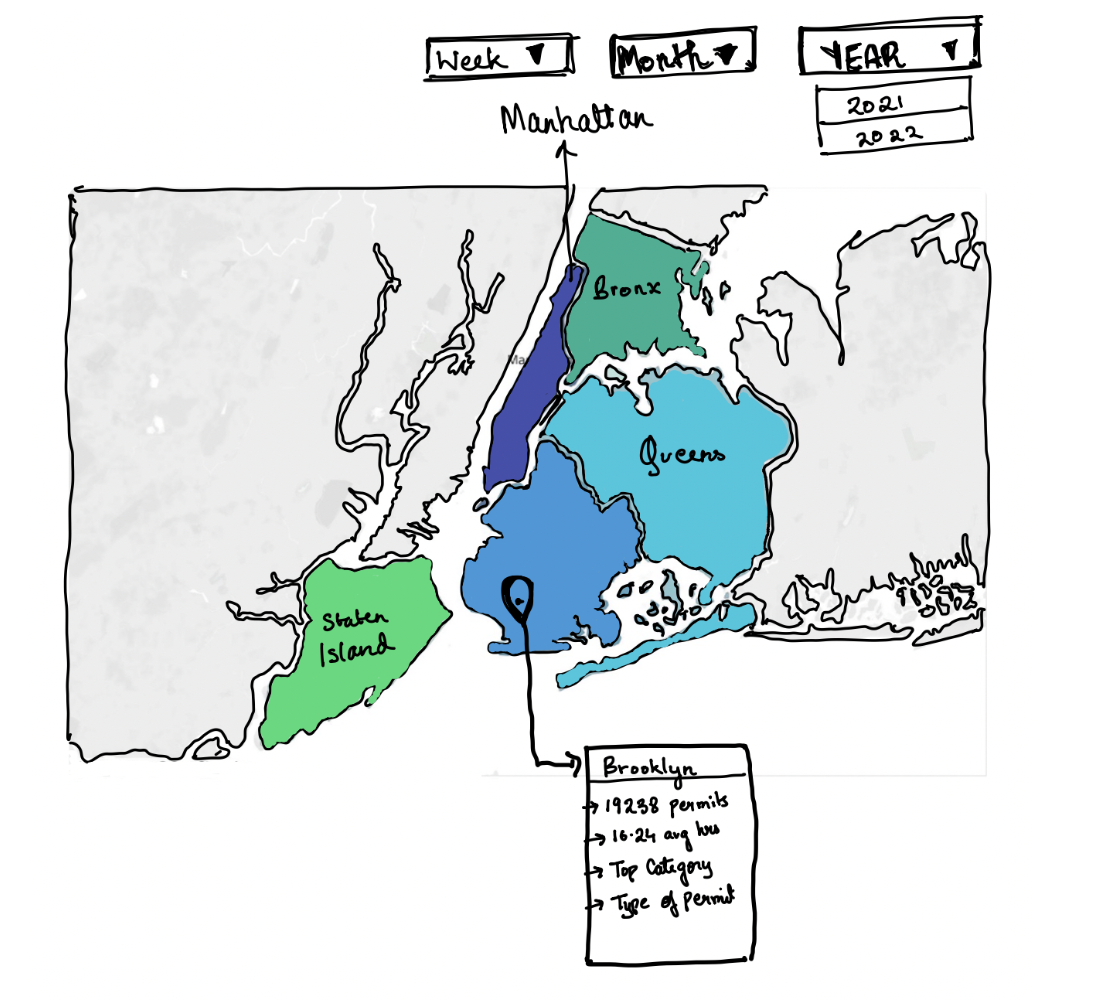